### Predictive Analytics
### Covid-19 Canada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

## Importing dataset

In [2]:
df = pd.read_csv("C:\\Users\\annaj\\OneDrive\\Desktop\\Git Projects\\Predictive-Analytics-Covid\\ignore folder\\COVID19-eng.csv", index_col=False)
df = df.drop(columns=['COV_ID'])
df

COV_REG  COV_EW  COV_EWG  COV_EY  COV_GDR  COV_AGR  COV_HSP  COV_DTH
0              1      99        0      99        1        6        9        2
1              1      99        0      99        1        8        3        1
2              1      99        0      99        1        3        1        2
3              1      99        0      99        2        4        3        2
4              1      99        0      99        2        7        1        1
...          ...     ...      ...     ...      ...      ...      ...      ...
1048570        5       1        0      22        2        2        9        9
1048571        5       1        0      22        2        1        9        9
1048572        5       1        0      22        2        5        3        9
1048573        5       1        0      22        2        2        9        9
1048574        5       1        0      22        2        5        3        9

[1048575 rows x 8 columns]

In [3]:
# 'region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death'

#### Since the columns aren't entirely clear to me at the moment, I would rather rename each column based on the dataset's description provided in the following link: https://www150.statcan.gc.ca/n1/pub/13-26-0002/132600022020001-eng.htm


In [4]:
column_name_mapping = {
    'COV_REG': 'region',
    'COV_EW': 'episode_week',
    'COV_EWG': 'episode_week_group',
    'COV_EY': 'episode_year',
    'COV_GDR': 'gender',
    'COV_AGR': 'age',
    'COV_HSP': 'hospital_status',
    'COV_DTH': 'death'
}

# Rename the columns based on the mapping
df.rename(columns=column_name_mapping, inplace=True)
df

region  episode_week  episode_week_group  episode_year  gender  age  \
0             1            99                   0            99       1    6   
1             1            99                   0            99       1    8   
2             1            99                   0            99       1    3   
3             1            99                   0            99       2    4   
4             1            99                   0            99       2    7   
...         ...           ...                 ...           ...     ...  ...   
1048570       5             1                   0            22       2    2   
1048571       5             1                   0            22       2    1   
1048572       5             1                   0            22       2    5   
1048573       5             1                   0            22       2    2   
1048574       5             1                   0            22       2    5   

         hospital_status  death  
0                      9      2  
1                      3      1  
2                      1      2  
3                      3      2  
4                      1      1  
...                  ...    ...  
1048570                9      9  
1048571                9      9  
1048572                3      9  
1048573                9      9  
1048574                3      9  

[1048575 rows x 8 columns]

### Cleaning Data

In [5]:
# Display general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype
---  ------              --------------    -----
 0   region              1048575 non-null  int64
 1   episode_week        1048575 non-null  int64
 2   episode_week_group  1048575 non-null  int64
 3   episode_year        1048575 non-null  int64
 4   gender              1048575 non-null  int64
 5   age                 1048575 non-null  int64
 6   hospital_status     1048575 non-null  int64
 7   death               1048575 non-null  int64
dtypes: int64(8)
memory usage: 64.0 MB


### result: all columns are integer, no need to convert them to numeric.

In [6]:
# Count missing values in each column
missing_data = df.isna().sum()

# Display the count of missing values
print(missing_data)

region                0
episode_week          0
episode_week_group    0
episode_year          0
gender                0
age                   0
hospital_status       0
death                 0
dtype: int64


### result: there is no missing data. 

### finding ouliers with boxplot

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


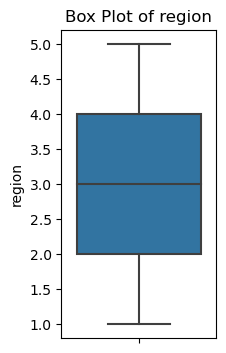

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


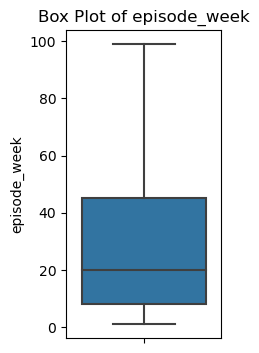

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


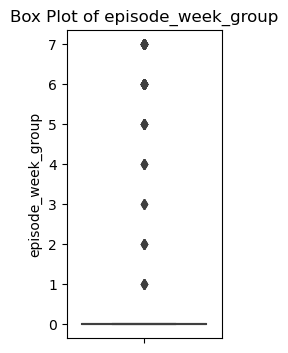

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


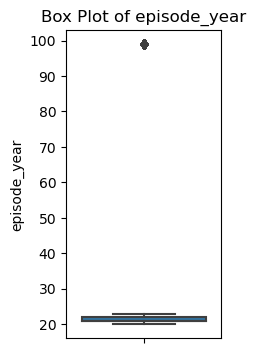

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


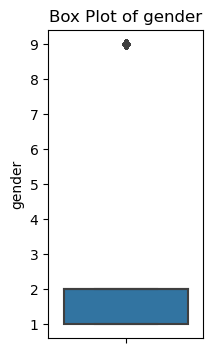

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


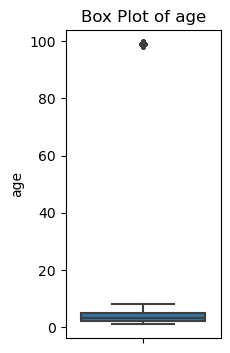

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


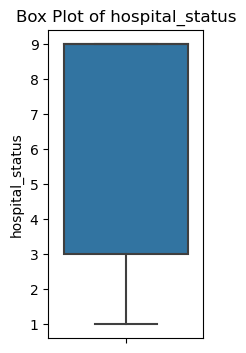

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


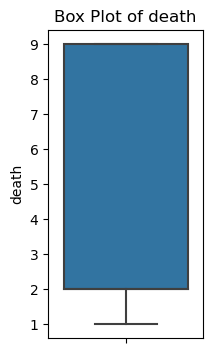

In [7]:

# boxplots

for column in df.columns:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

##### Result: I found some outliers in columns "episode_week_group", "episode_year," "gender," and "age." But after careful investigation in the dataset and also in the description of the dataset (that is available in this link: https://www150.statcan.gc.ca/n1/pub/13-26-0002/132600022020001-eng.htm), I found out that all "Not stated/Unknown" values are classified as '9' or '99,' which means the data collector (preparer) replaced all missing values with these two data. So in the following steps, first of all, I must convert all these 9s and 99s to NaN values.<br><br>


In [8]:
"""
In the following codes I will change the value 9 in 'gender' to Nan values, and also change the value 9 in 
'hospital_status' and 'death columns' to -1, because the missing values  in these two columns are very significant 
and these missing values shows the "Not Stated", so we can indicate them as a new category in these two columns.  
and  I will change the value 99 in 'episode_week', 'episode_year' and 'age' columns to Nan values too. 

""" 
col_9=['hospital_status', 'death'] 
gender_9 = ['gender']
col_99 = ['episode_week', 'episode_year', 'age']

df[col_9] = df[col_9].replace(9, -1)
df[gender_9] = df[gender_9].replace(9, np.nan)
df[col_99] = df[col_99].replace(99, np.nan)

# Count missing values in each column
missing_data = df.isna().sum()

# Display the count of missing values
print(missing_data)

region                   0
episode_week          3331
episode_week_group       0
episode_year          2611
gender                3625
age                    695
hospital_status          0
death                    0
dtype: int64


#### Result:
##### Now we can see how many missing values we actually have in the columns. Therefore, I need to handle these missing values properly. I've realized that in this dataset, some columns, such as "age" and "region,"are not truly about exact numbers; they're more like categories than actual numerical values, such as a person's real age. Consequently, when dealing with these missing values, we should treat them as categories rather than numerical values.

In [9]:
""" 
here for dealing with missing values I used SimpleImputer from sklearn library.
"""

# Create a SimpleImputer with the 'most_frequent' strategy for categorical columns
col_imputer = SimpleImputer(strategy='most_frequent')

# Specify the categorical columns to impute
col = ['gender', 'episode_week', 'episode_year', 'age']

# Impute missing values in categorical columns
df[col] = col_imputer.fit_transform(df[col])

# Now, df contains imputed values for the specified columns
df.isna().sum()

region                0
episode_week          0
episode_week_group    0
episode_year          0
gender                0
age                   0
hospital_status       0
death                 0
dtype: int64

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


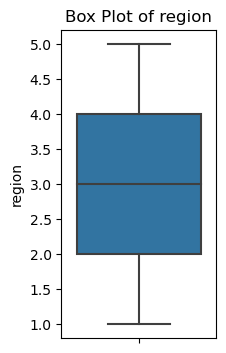

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


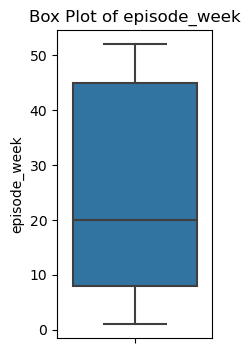

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


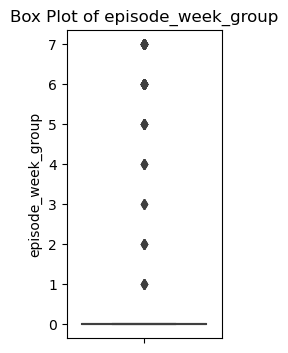

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


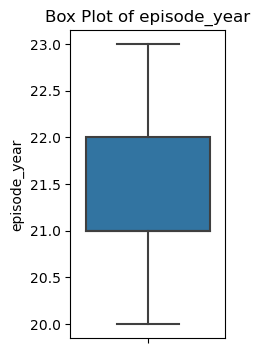

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


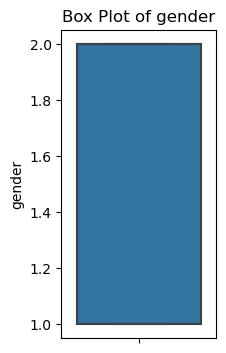

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


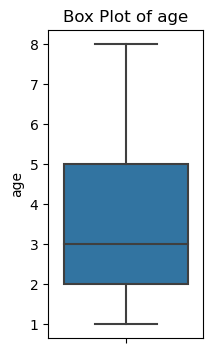

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


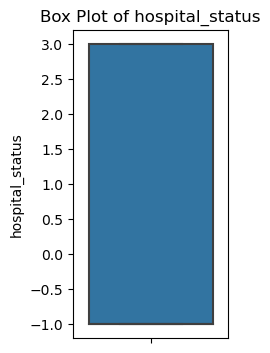

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


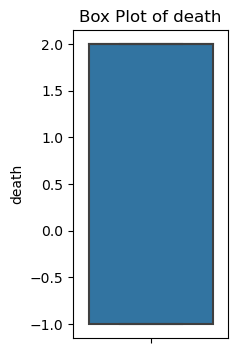

In [10]:
# boxplots

for column in df.columns:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

#### Finding ouliers 
##### Outlier detection methods for categorical data are not applicable in the same way as for numerical data. However, you can gain insights into your categorical data by using the value_counts method, which provides the frequency of each element within a column. Visualizing this data through pie charts can be a practical approach to understand the distribution of categorical values. source link: https://math.stackexchange.com/questions/219264/are-outliers-possible-with-categorical-data


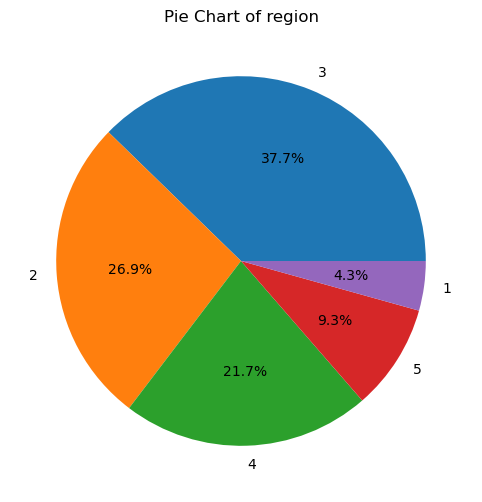

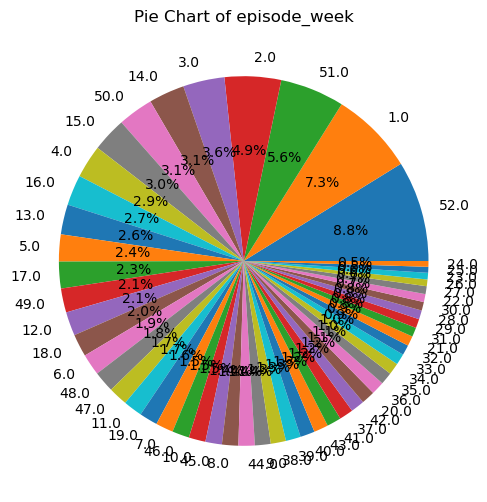

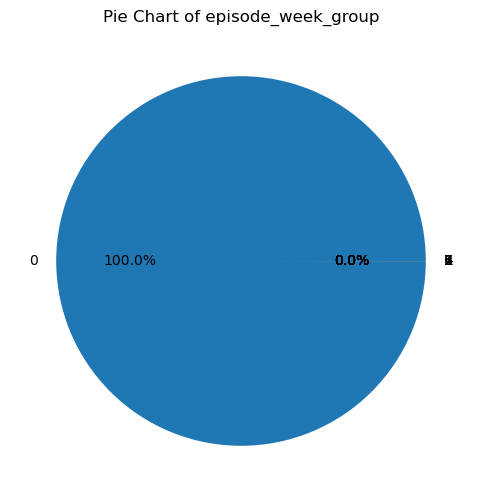

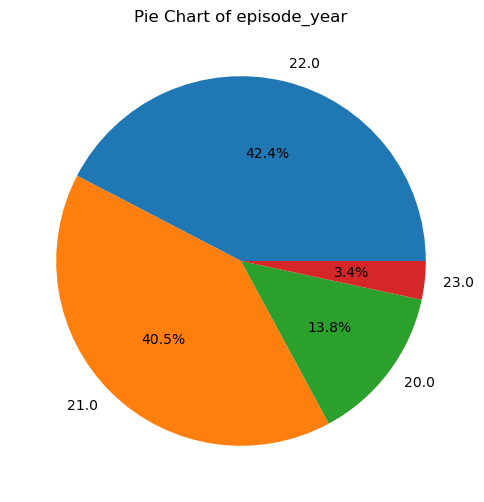

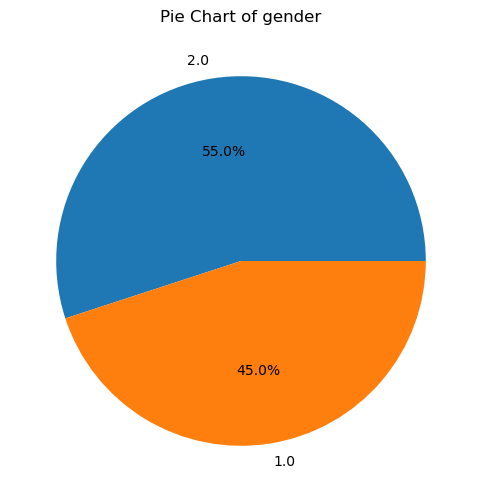

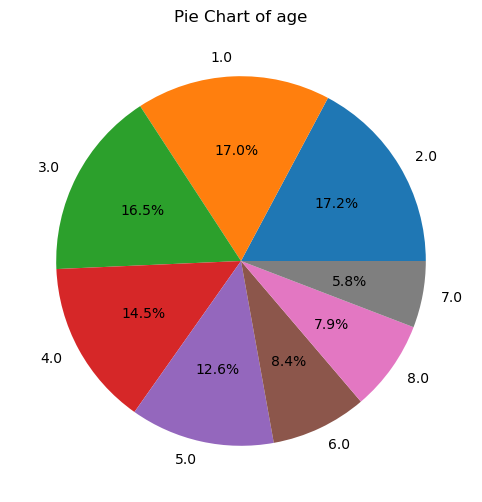

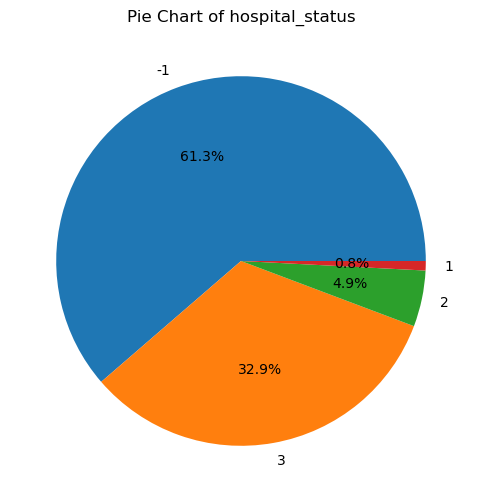

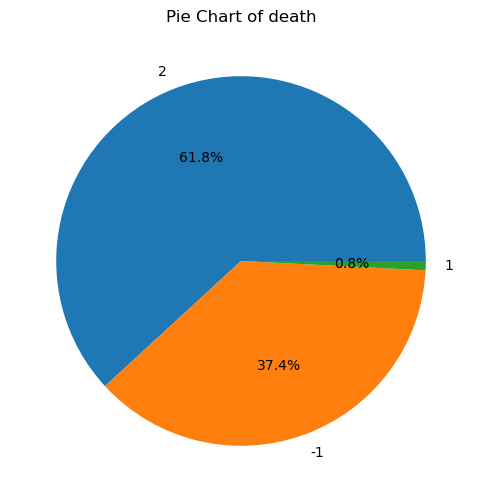

In [11]:
# List of columns to create pie charts for
columns_to_plot = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']

# Assuming 'df' is your DataFrame
for column in columns_to_plot:
    column_count = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()

In [12]:
# if We remove all "Not Stated" values from two columns of "hospital_status" and "death"
"""df = df.replace(-1, np.nan)
df.dropna(inplace=True)
df.isna().sum()"""

'df = df.replace(-1, np.nan)\ndf.dropna(inplace=True)\ndf.isna().sum()'

In [13]:
# List of columns to create pie charts for
"""columns_to_plot = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']

for column in columns_to_plot:
    column_count = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()"""

"columns_to_plot = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']\n\nfor column in columns_to_plot:\n    column_count = df[column].value_counts()\n    plt.figure(figsize=(8, 6))\n    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%')\n    plt.title(f'Pie Chart of {column}')\n    plt.show()"

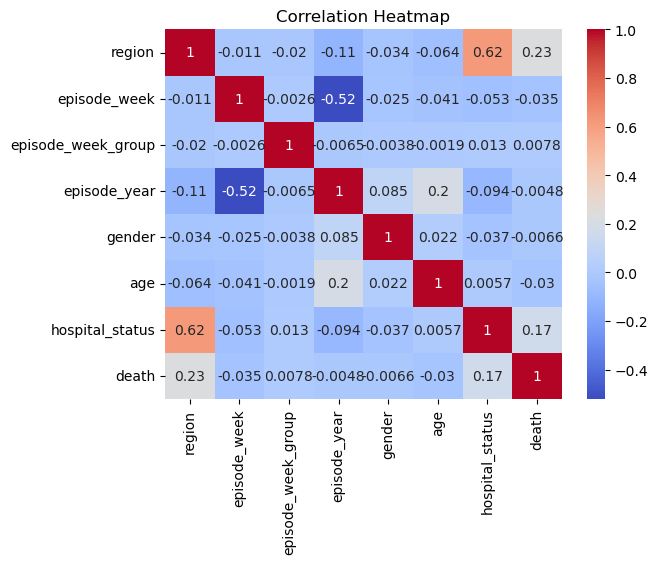

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

There is a significant relationship between region and age.


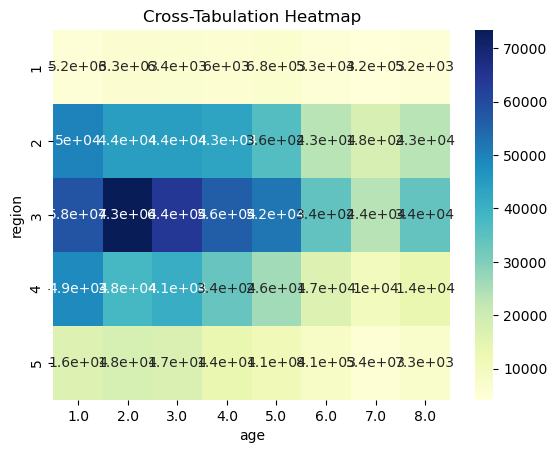

In [15]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['region'], df['age'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:  # Adjust the significance level as needed
    print("There is a significant relationship between region and age.")
else:
    print("No significant relationship between region and age.")

cross_tab = pd.crosstab(df['region'], df['age'])
# You can also visualize the cross-tabulation using a heatmap
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True)
plt.title("Cross-Tabulation Heatmap")
plt.show()


Interpreting heatmaps from cross-tabulations can be a bit tricky, but they can provide valuable insights into the relationships between two categorical variables. Here's a simple guide to help we interpret the information in a heatmap:
1.	Color Intensity: In a heatmap, the intensity of colors represents the frequency or count of observations in the cells. The colors can range from light (low counts) to dark (high counts). In our case, we used the 'YlGnBu' colormap, where lighter colors indicate lower counts and darker colors indicate higher counts.
2.	Annotations: Many heatmaps, as in our example, have numerical values inside each cell. These numbers show the actual counts in that cell. These are important because they give we a quantitative sense of the relationship between the two categorical variables.
3.	Patterns: Look for patterns or clusters of similar colors. These clusters can indicate associations between the categories of the two variables. For example, if we see a cluster of dark cells in a specific row and column, it means that those categories often occur together.
4.	Strength of Association: The strength of the relationship can be assessed by how much the colors vary. If we have a lot of dark cells in one area and mostly light cells in another, it suggests a strong relationship between the two variables. If the colors are fairly uniform, it indicates a weak relationship.
5.	Interpretation: To interpret the relationship, think about what the variables represent. For example, if ou're cross-tabulating 'region' and 'age,' and we see a dark cell at the intersection of 'Region A' and 'Age Group 30-40,' it suggests that a significant number of individuals in Region A fall into the age group 30-40.
6.	Expectations: Consider what we would expect to see based on our domain knowledge. Are the patterns in the heatmap aligning with our expectations, or are there surprises?
7.	Statistical Significance: Remember that the heatmap doesn't tell we whether the relationship is statistically significant. It only shows the observed frequencies. Ou'd use statistical tests (like the chi-squared test) to determine significance.
8.	Further Analysis: If we notice a strong relationship in the heatmap, we might want to investigate it further. It could be the basis for more in-depth statistical analysis or further exploration in our dataset.

source link: https://chartio.com/learn/charts/heatmap-complete-guide/


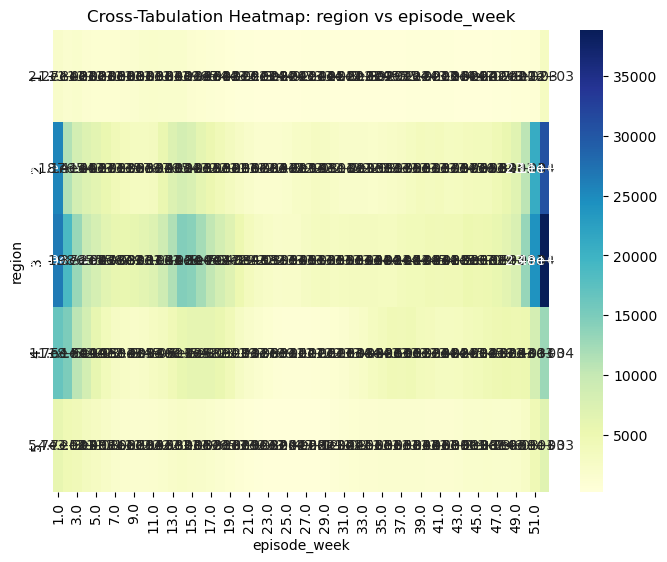

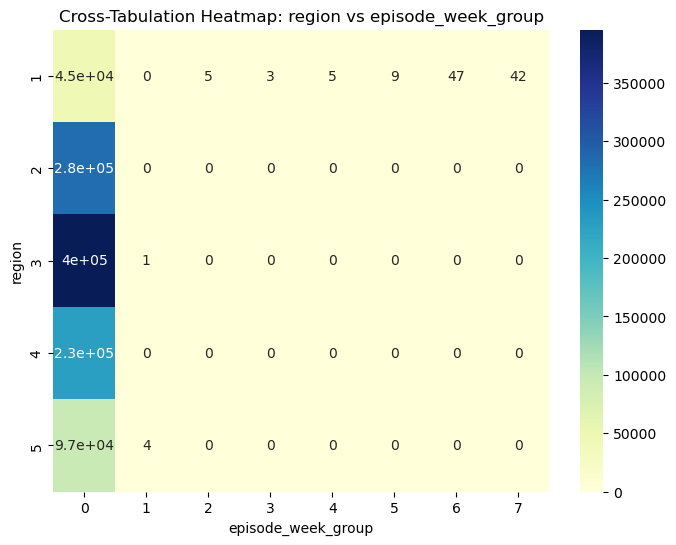

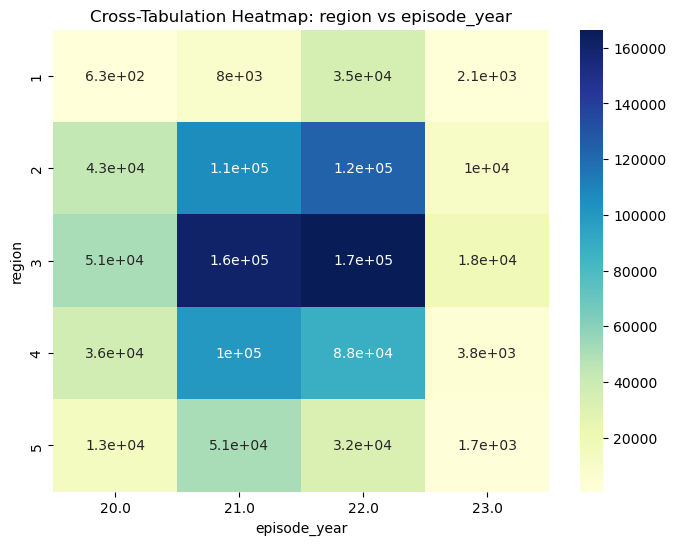

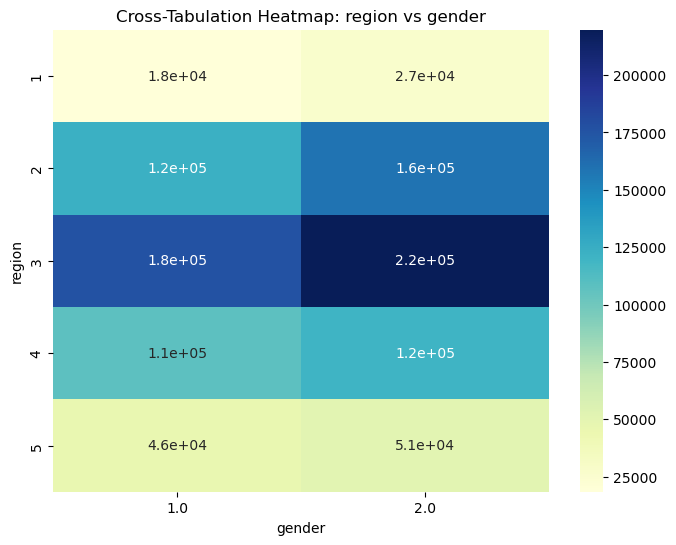

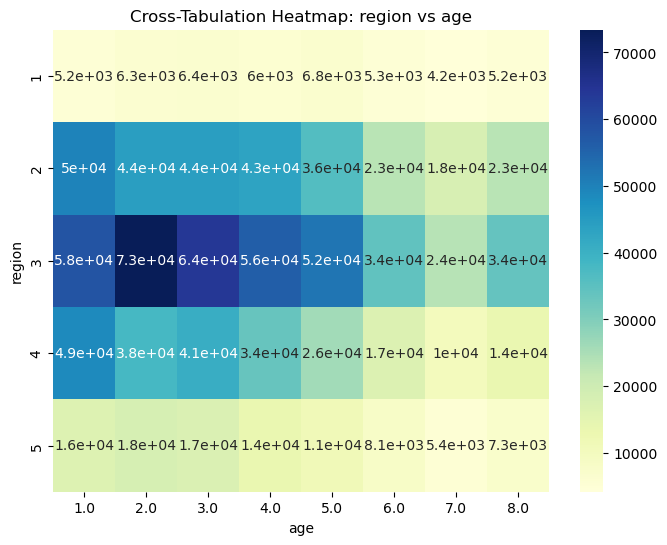

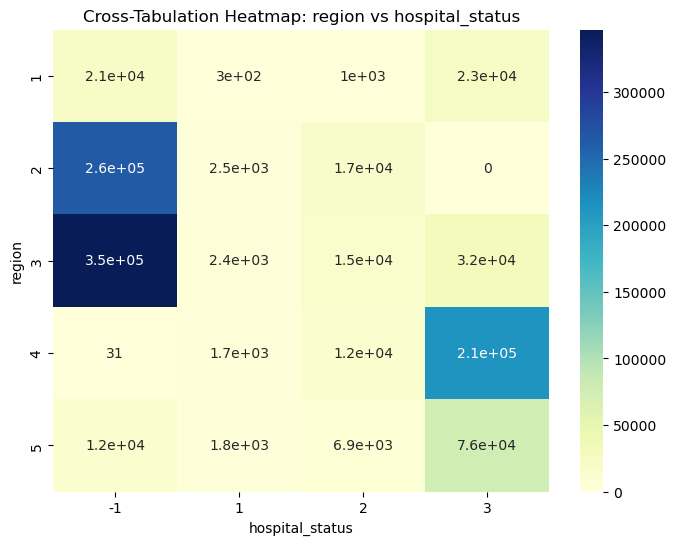

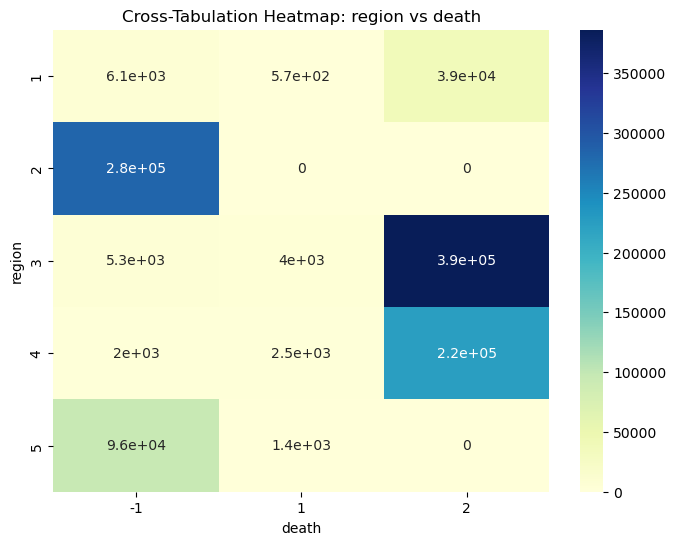

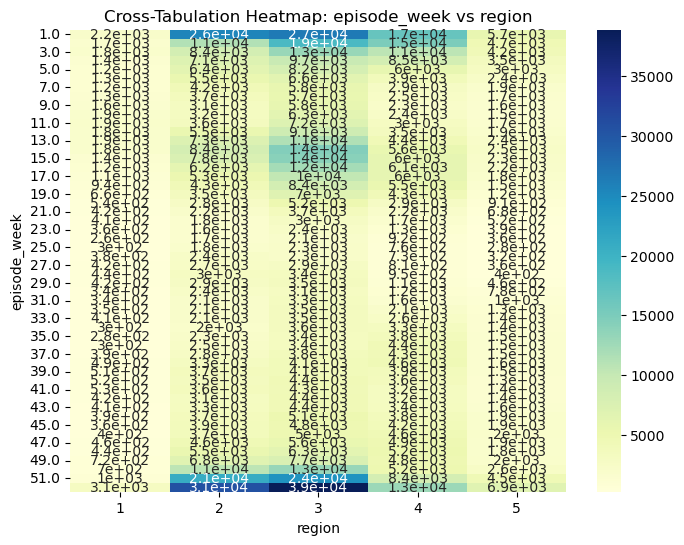

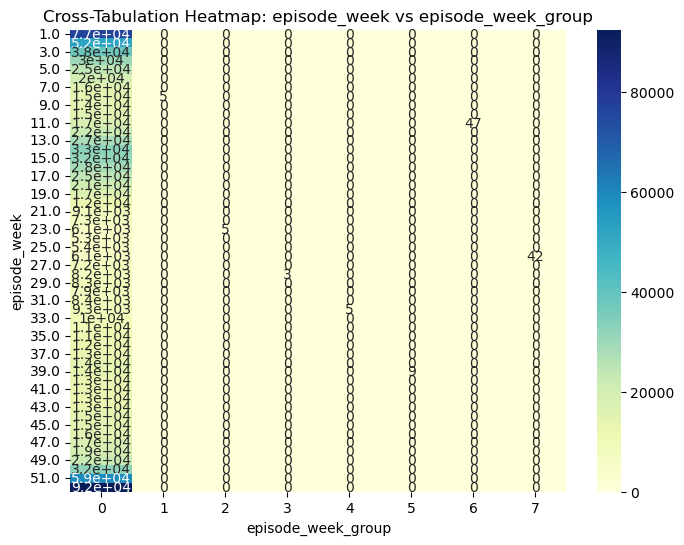

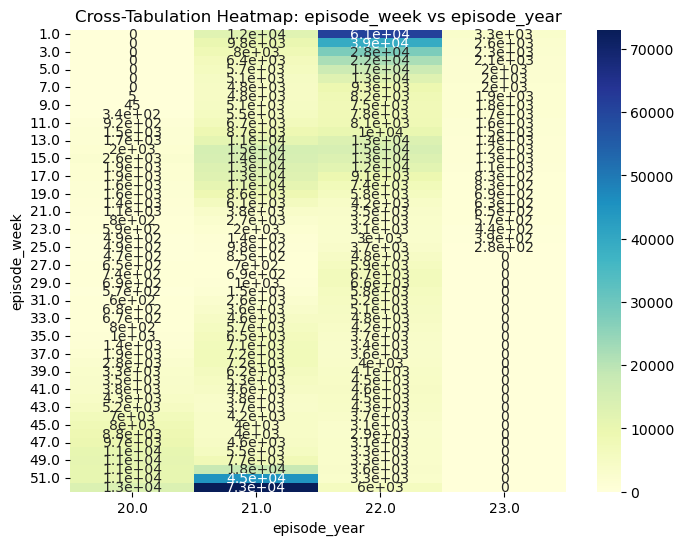

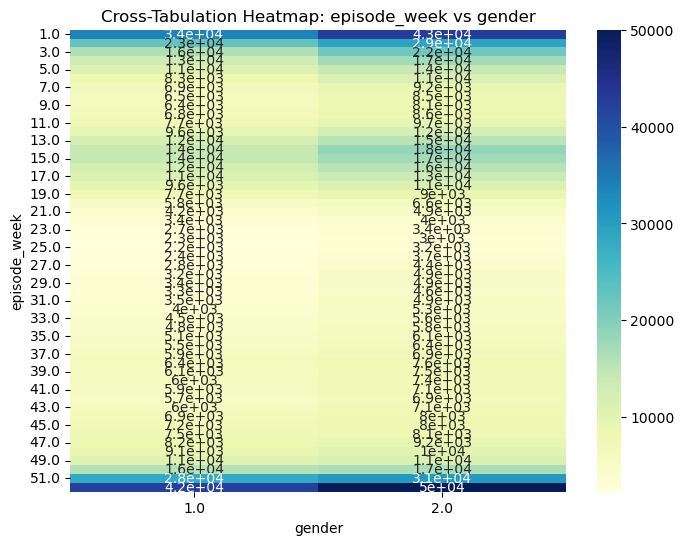

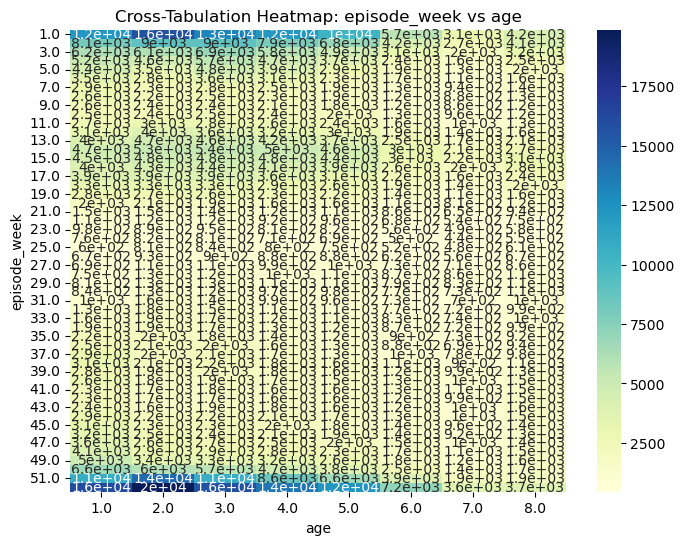

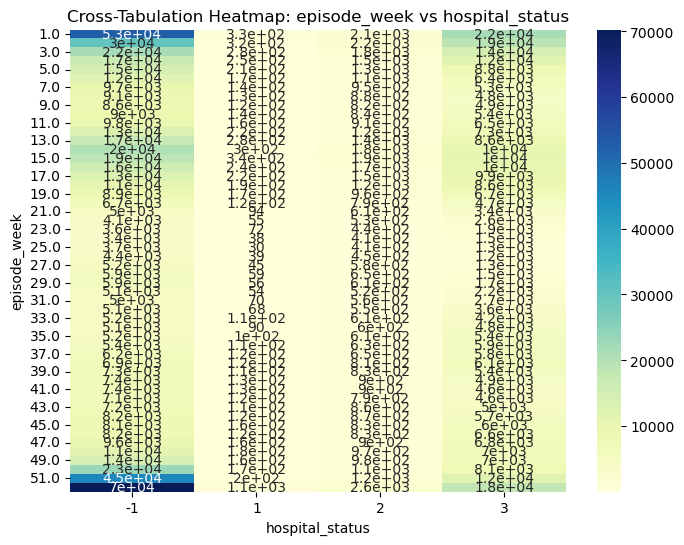

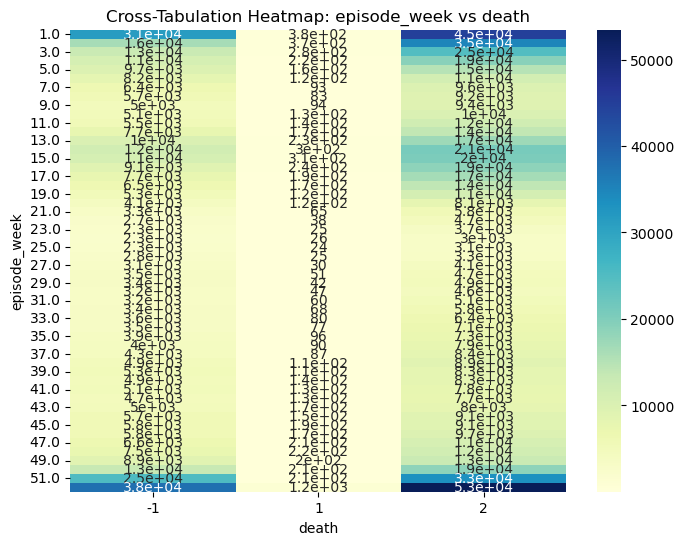

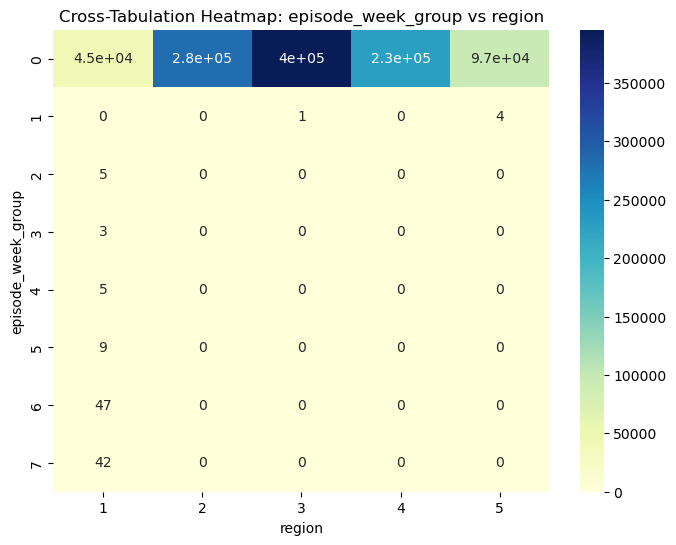

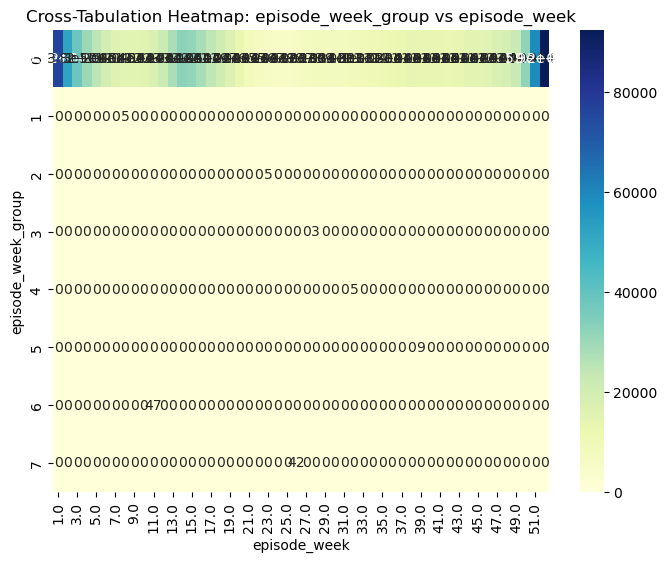

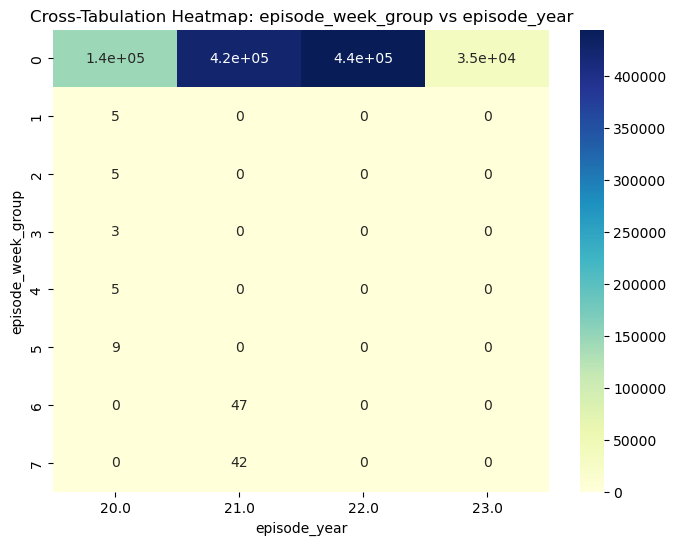

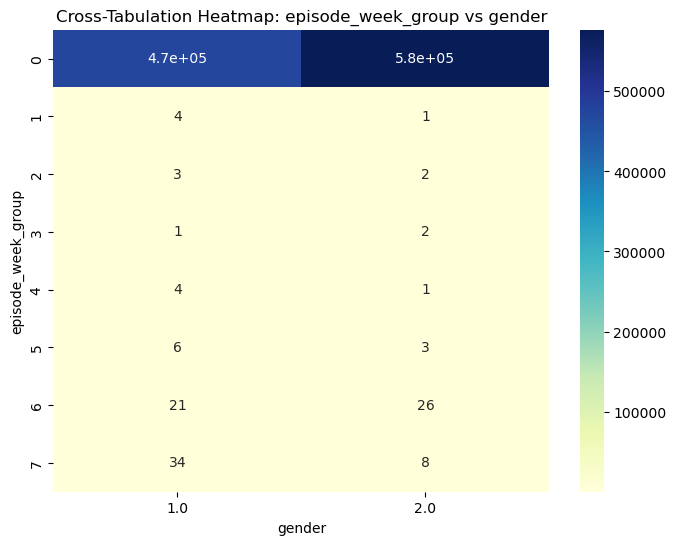

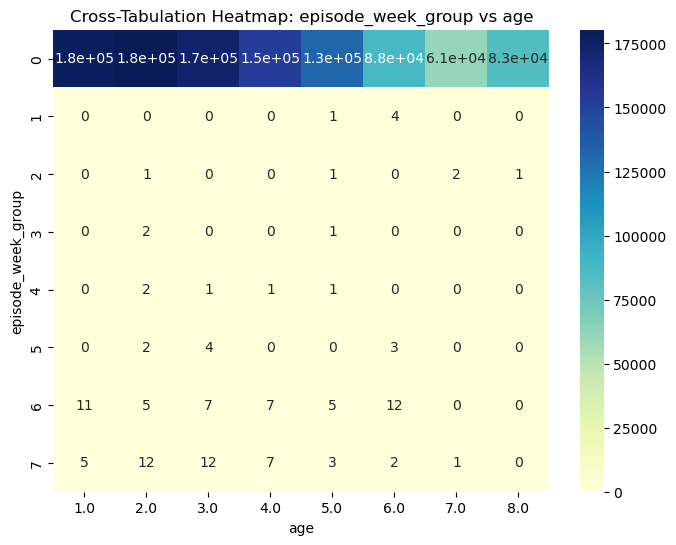

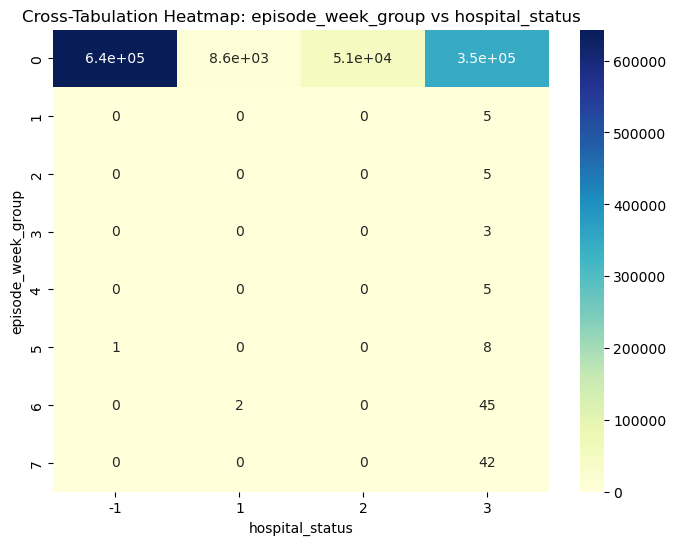

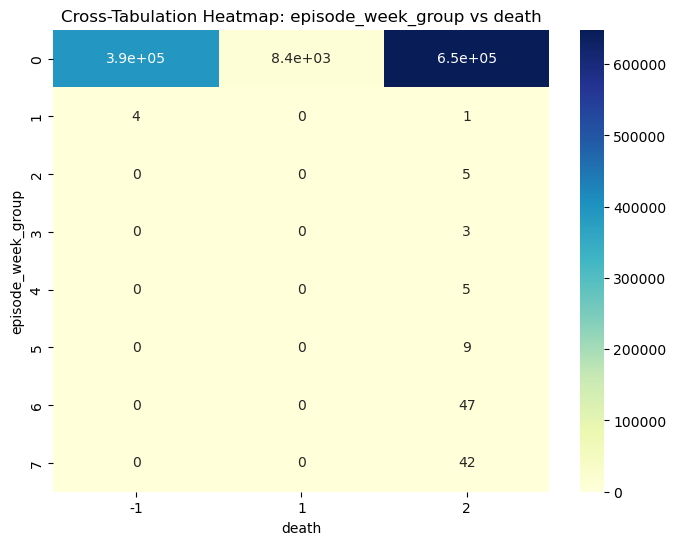

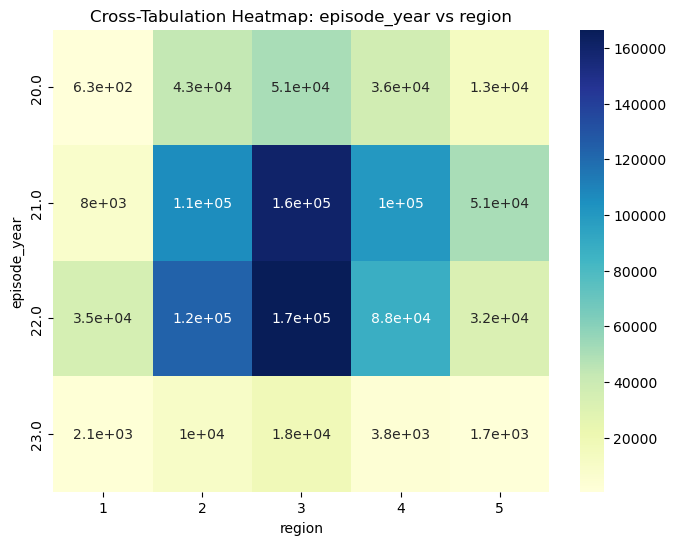

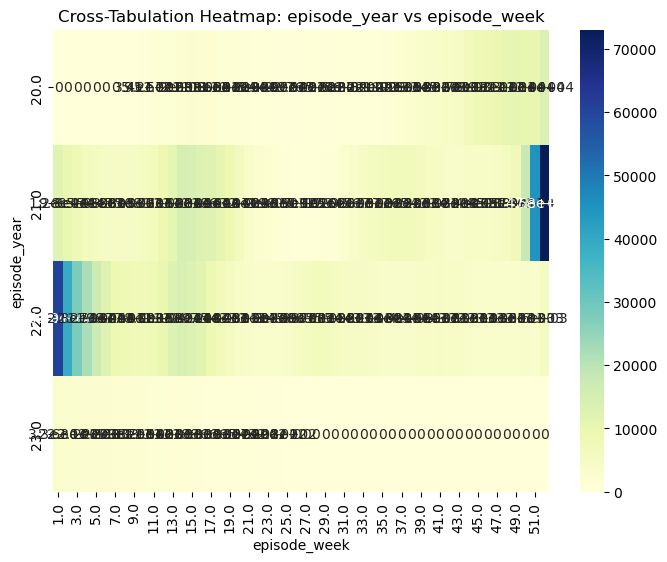

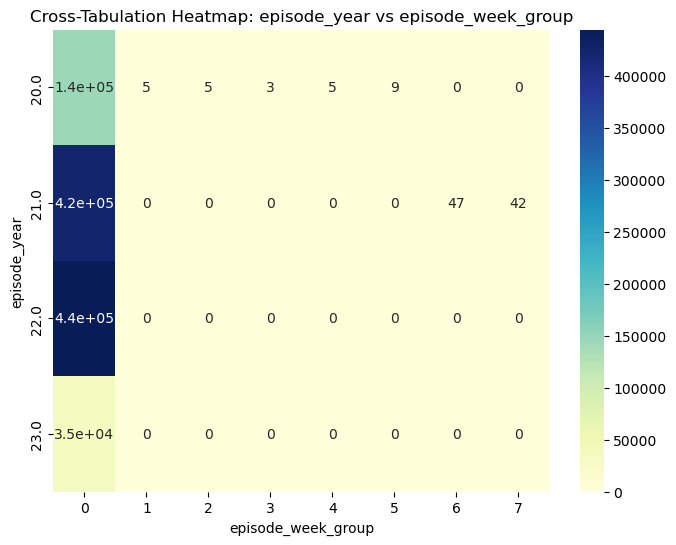

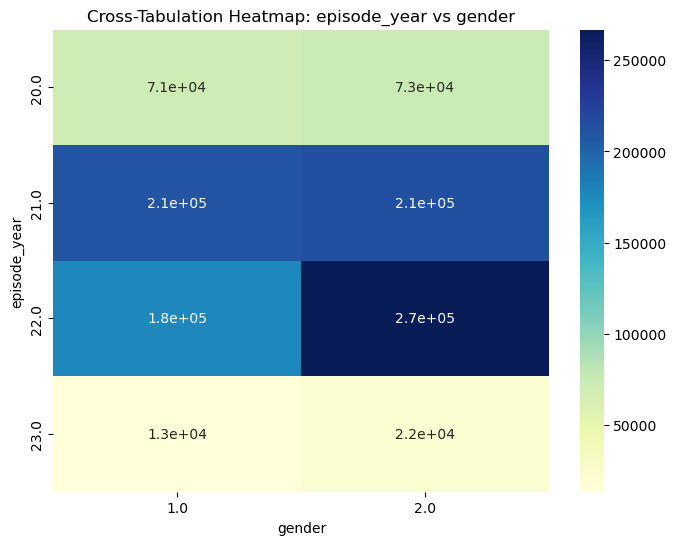

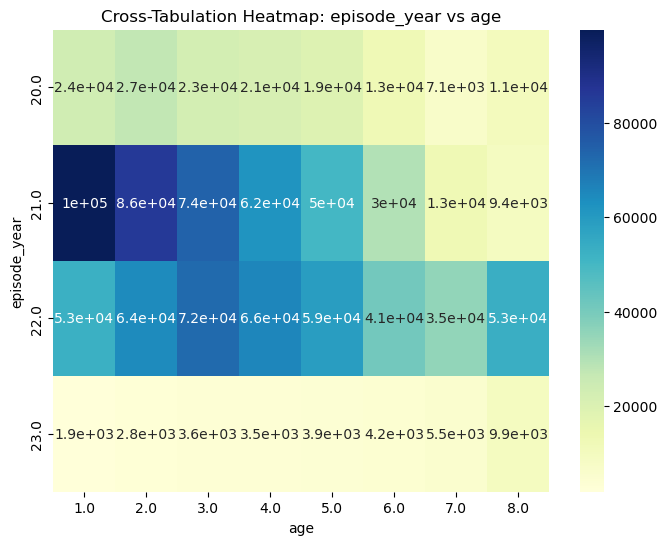

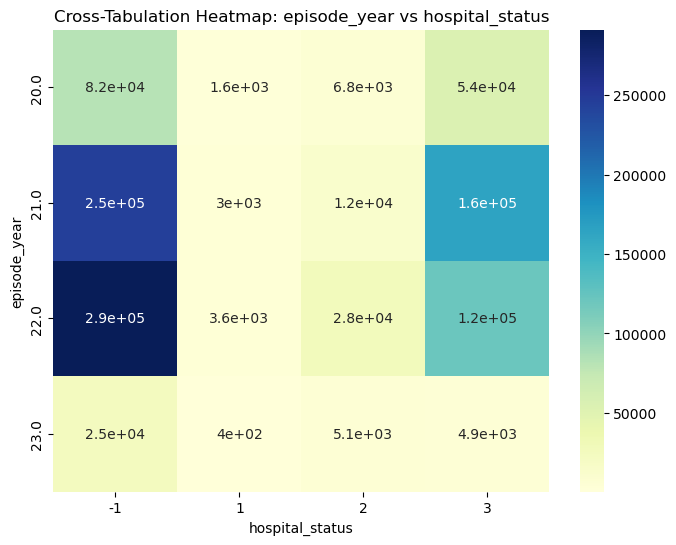

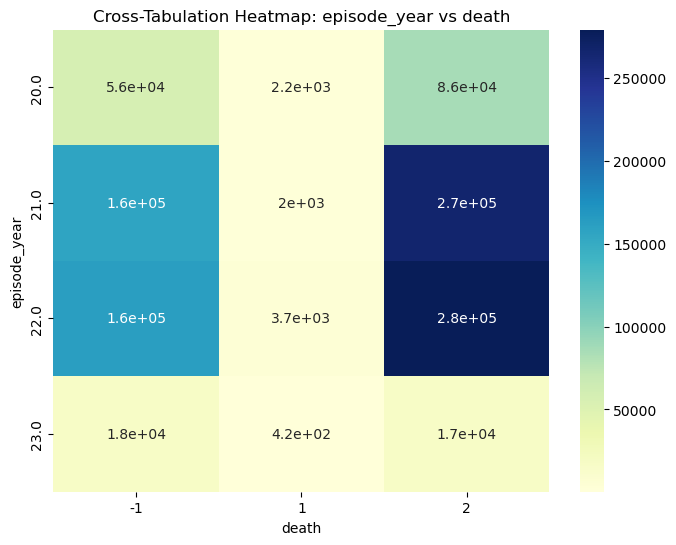

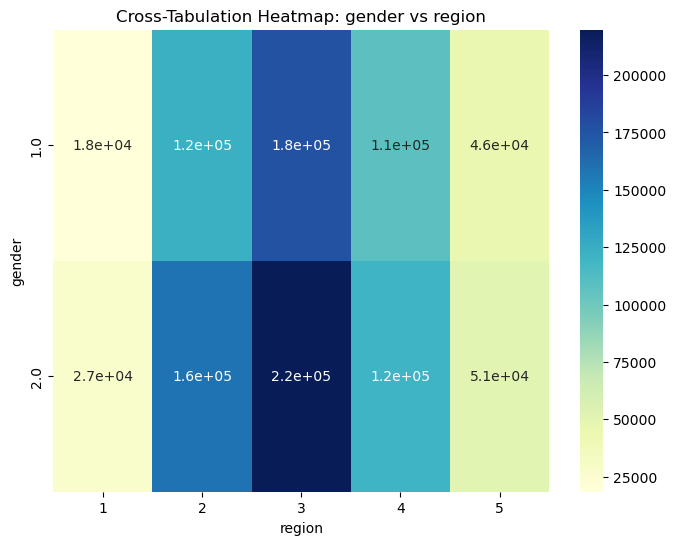

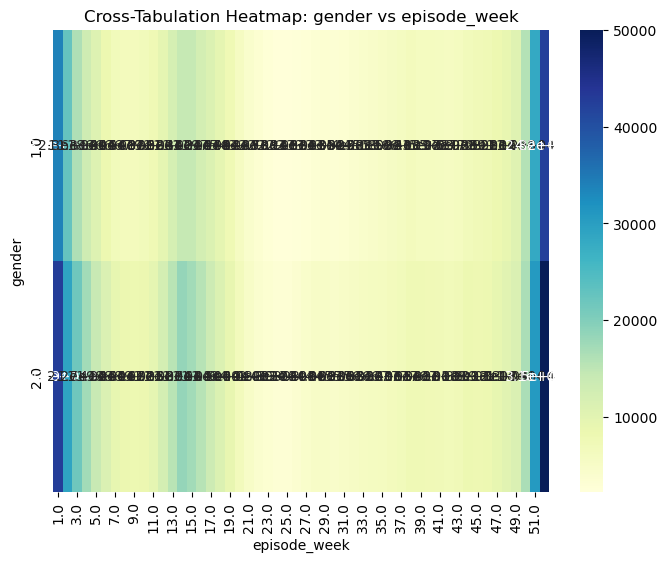

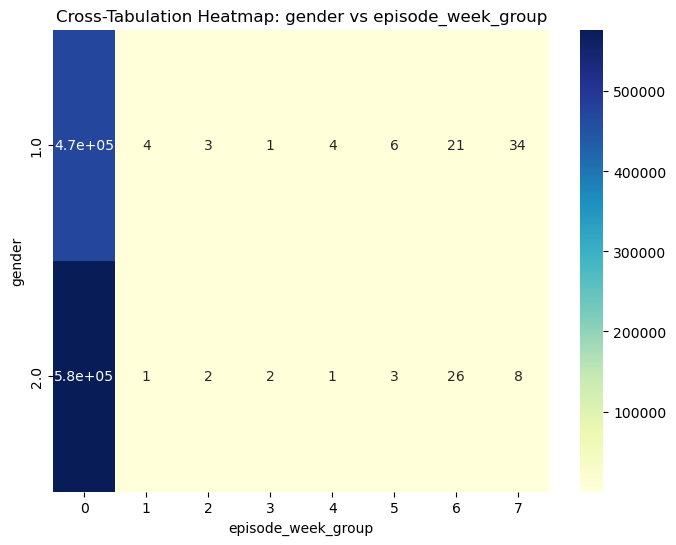

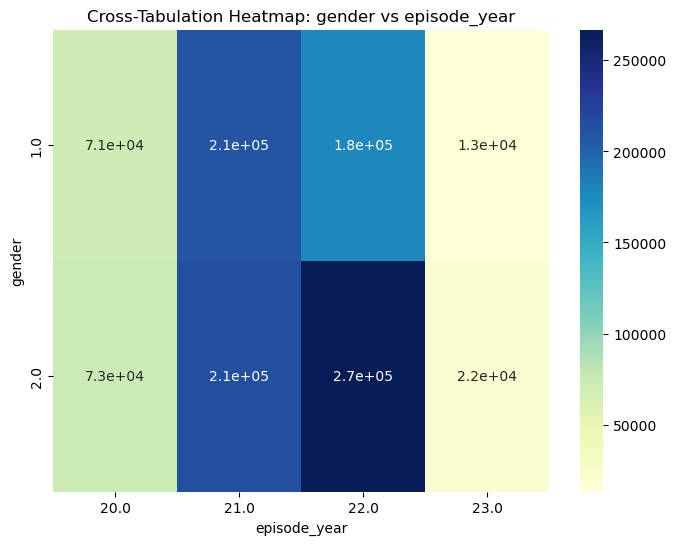

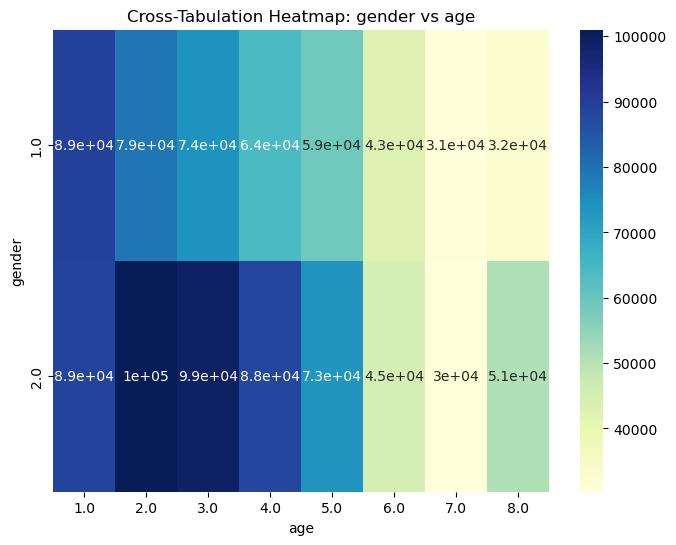

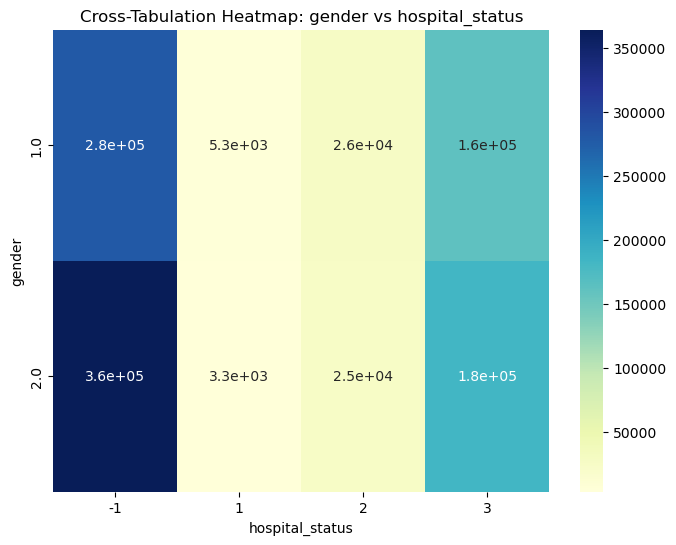

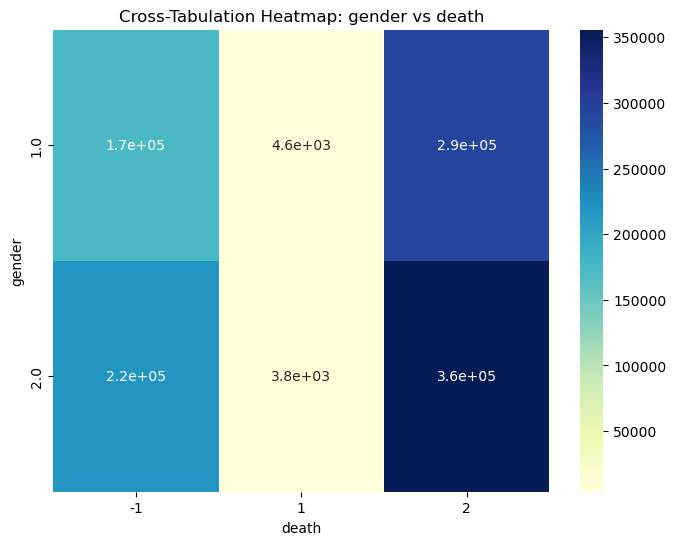

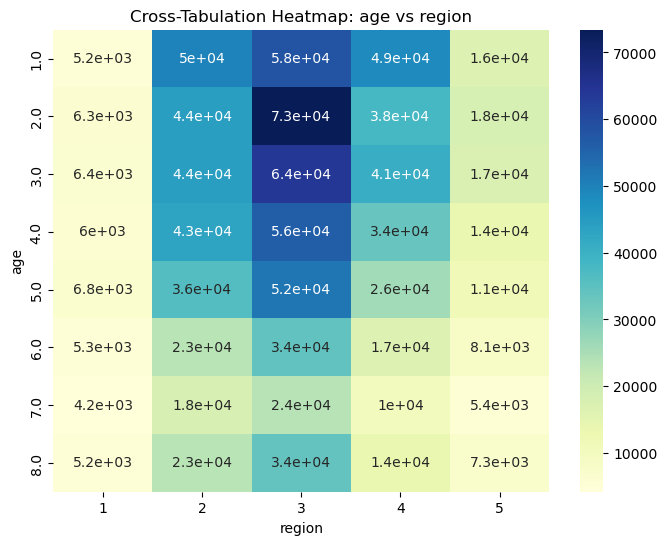

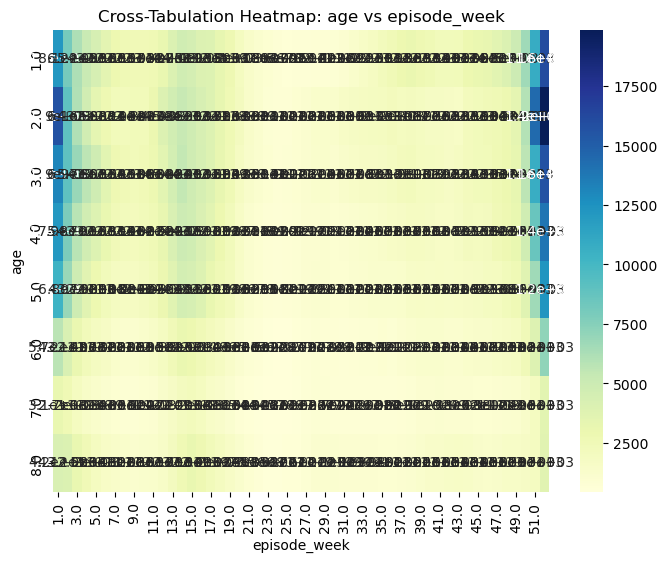

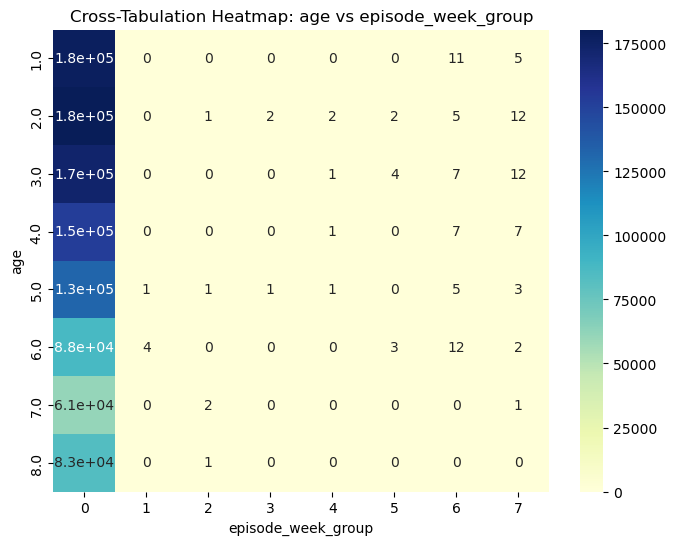

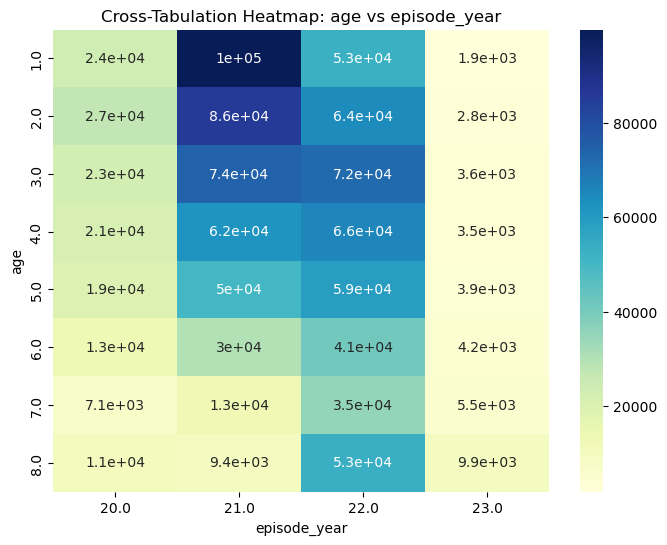

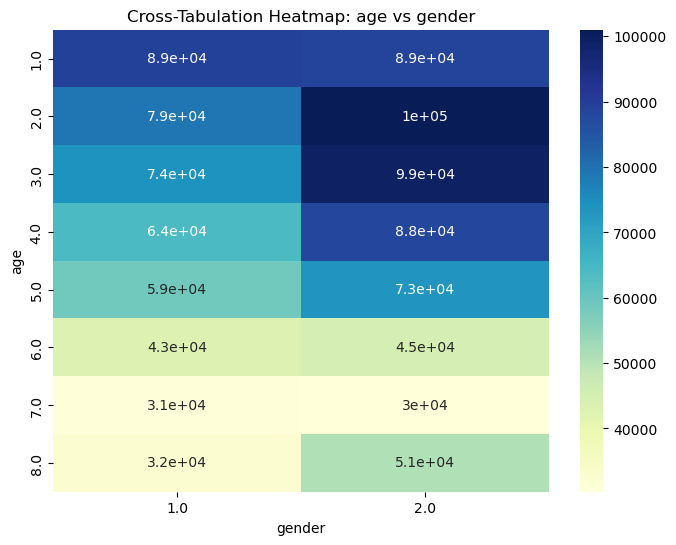

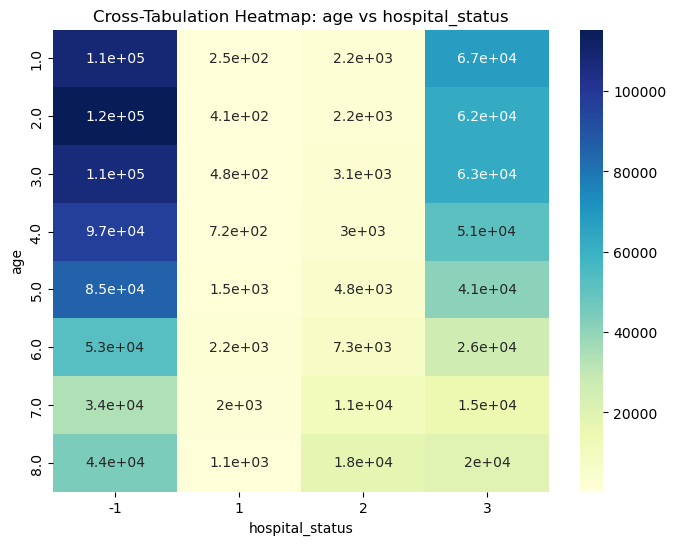

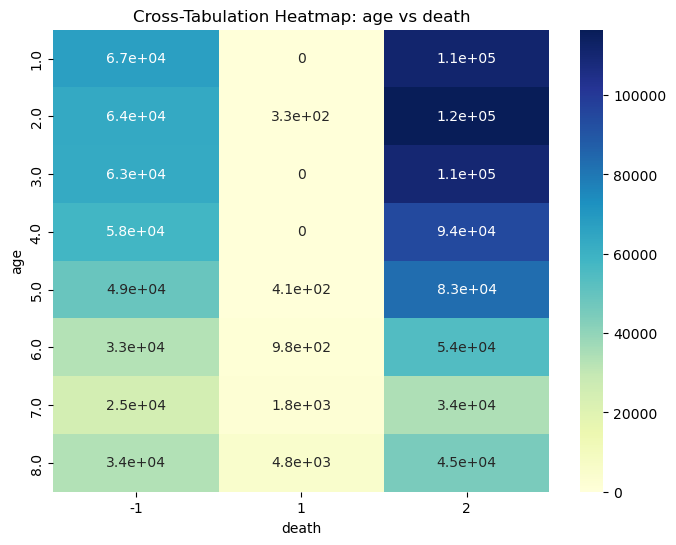

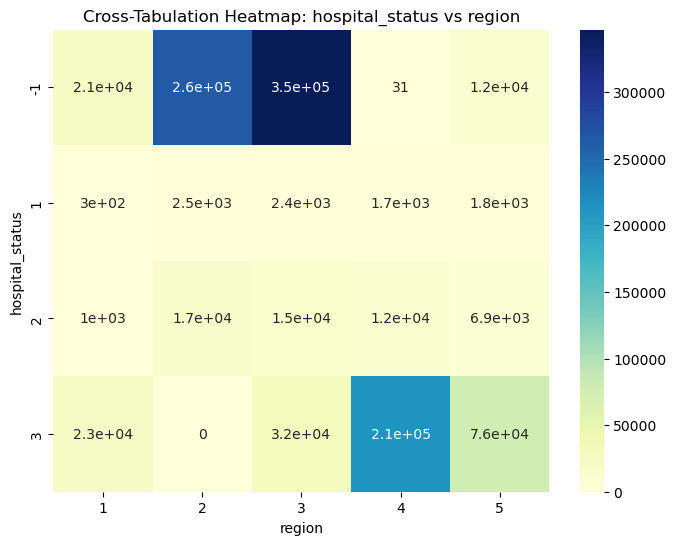

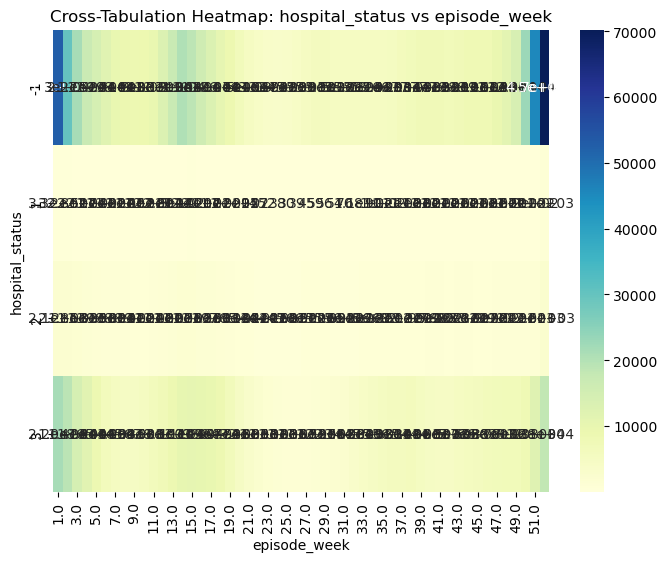

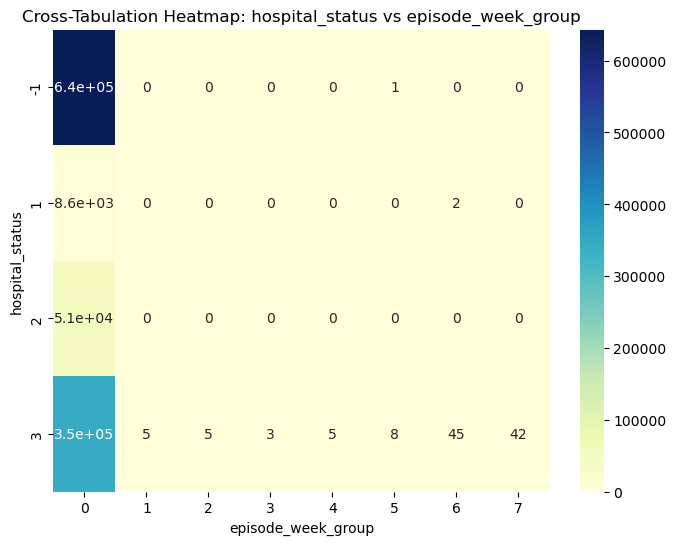

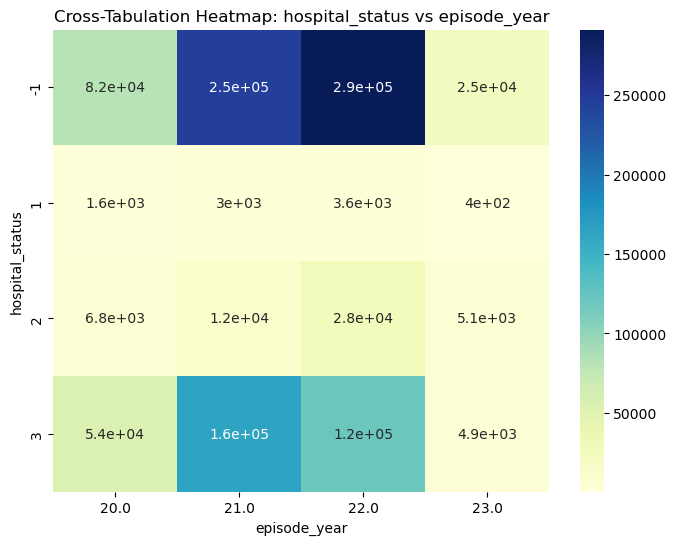

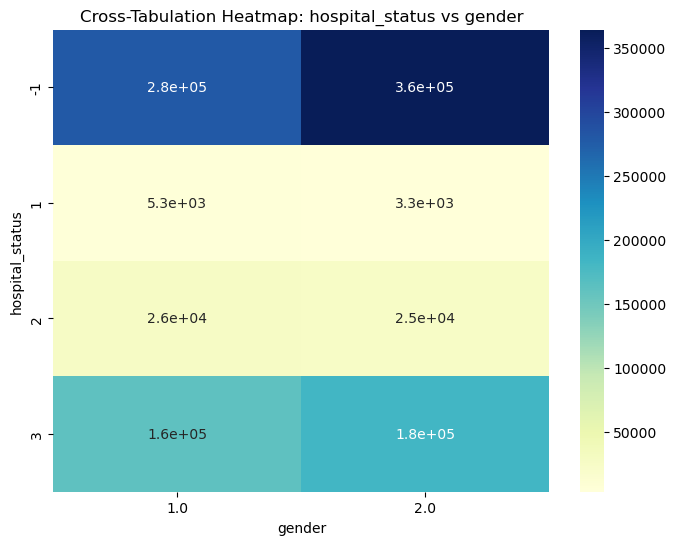

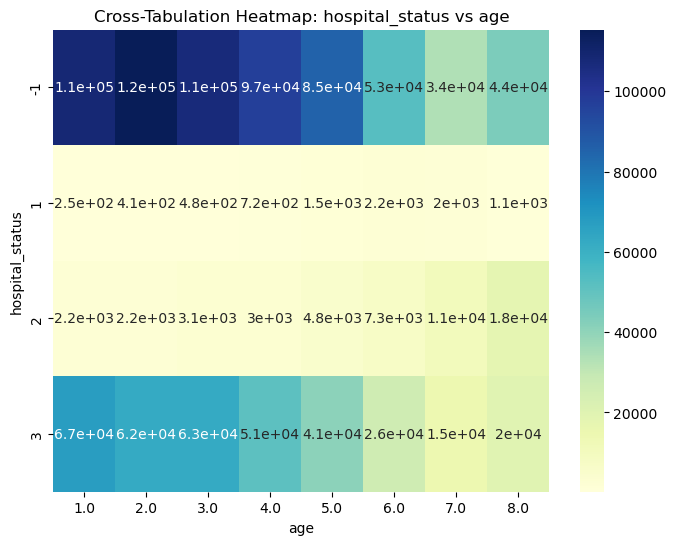

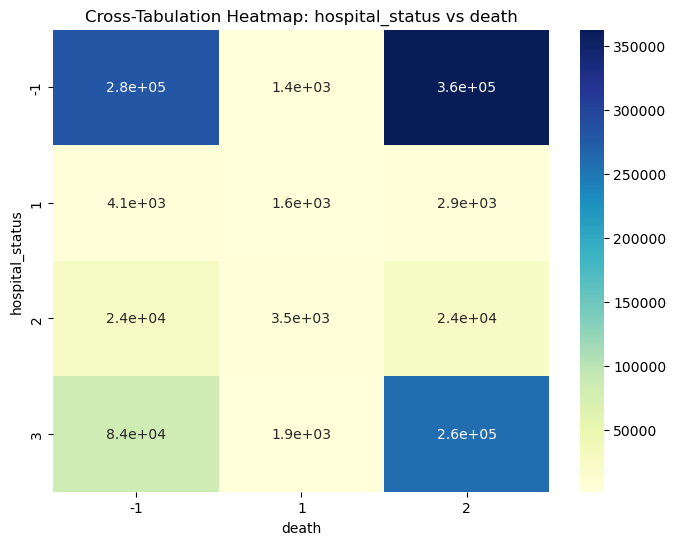

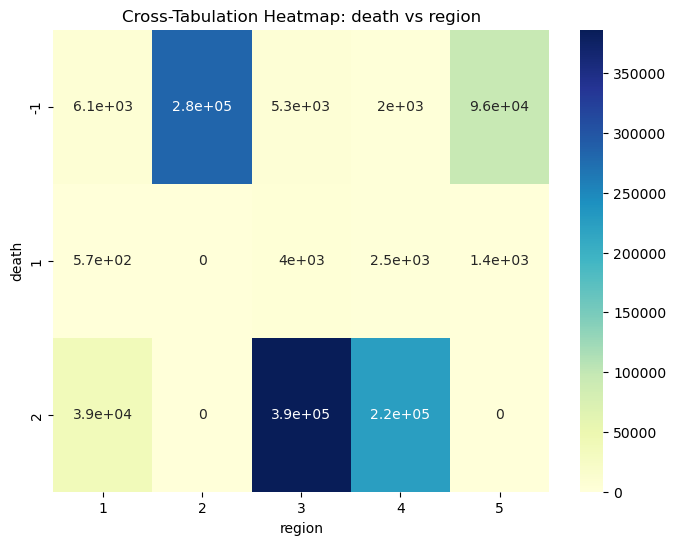

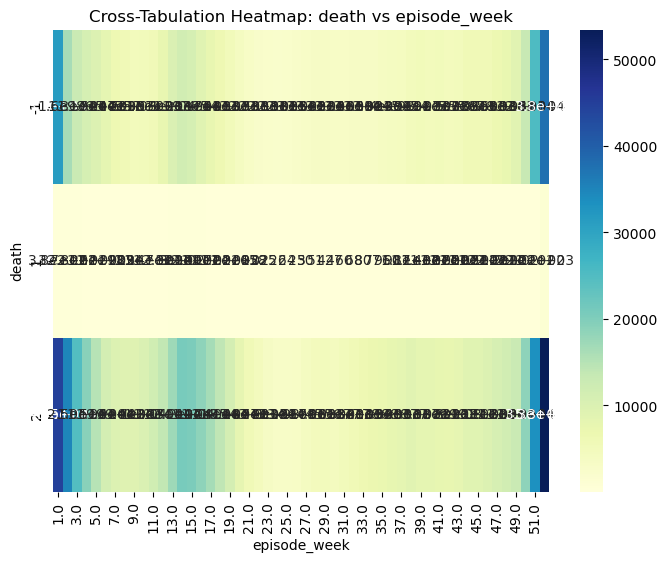

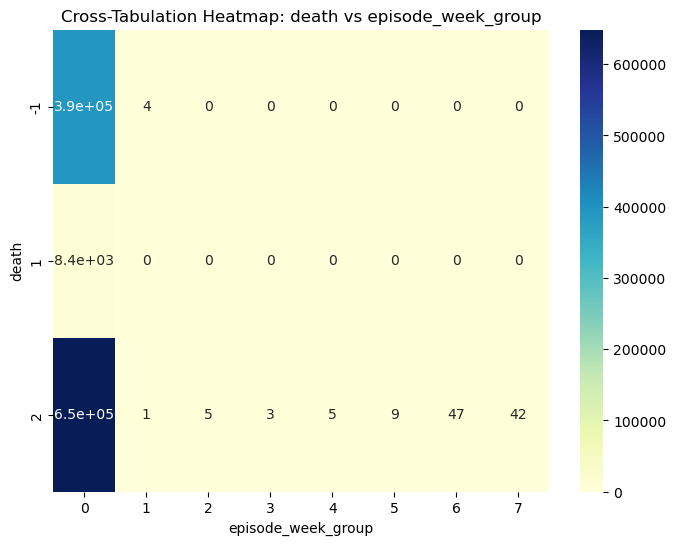

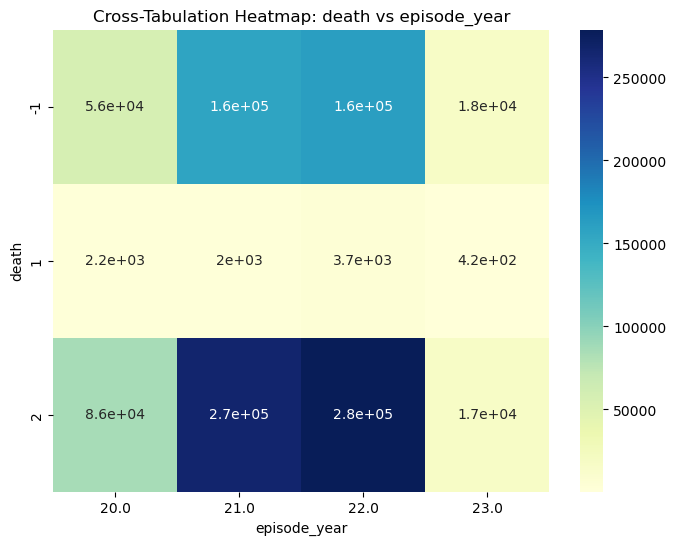

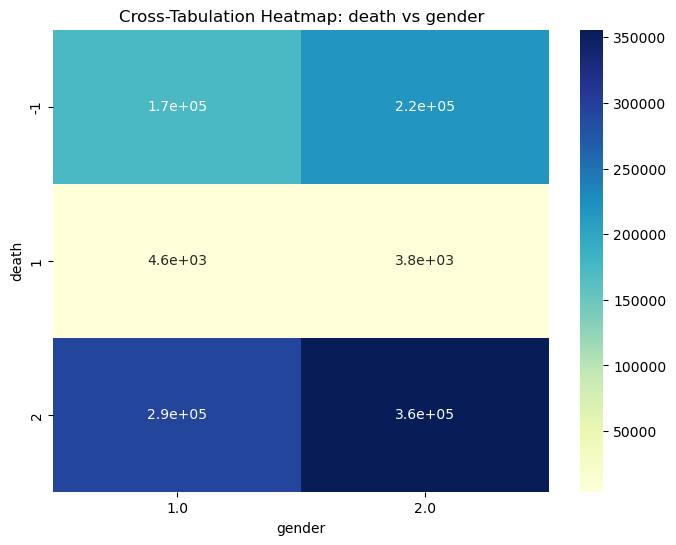

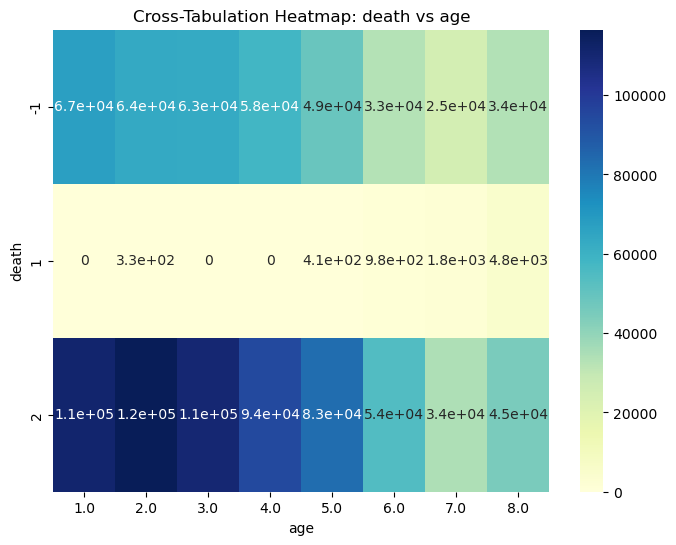

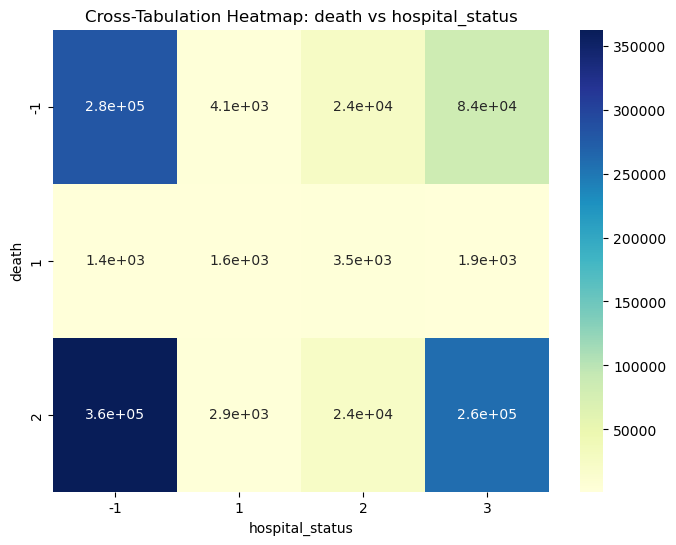

In [16]:
def visualize_relationships(df, categorical_columns):
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 != col2:
                # Create a contingency table
                cross_tab = pd.crosstab(df[col1], df[col2])
                
                # Visualize the cross-tabulation using a heatmap
                plt.figure(figsize=(8, 6))
                sns.heatmap(cross_tab, cmap='YlGnBu', annot=True)
                plt.title(f"Cross-Tabulation Heatmap: {col1} vs {col2}")
                plt.show()

# Example usage:
categorical_columns = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']  # Add the columns you want to analyze
visualize_relationships(df, categorical_columns)

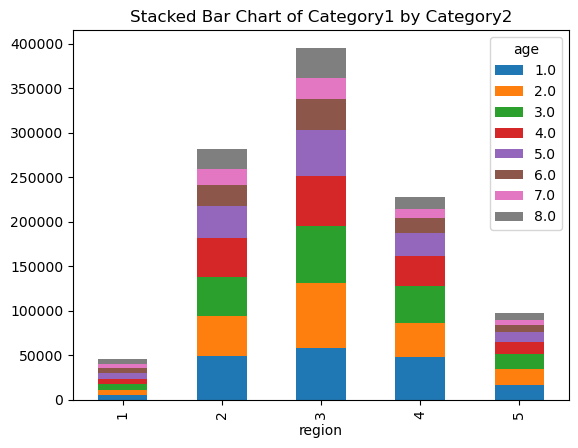

In [17]:
# Visualizations like stacked bar charts or heatmaps can help us visualize relationships 
# between categorical variables. Stacked bar charts can show the distribution of one category within another.

contingency_table = pd.crosstab(df['region'], df['age'])
contingency_table.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Category1 by Category2")
plt.show()




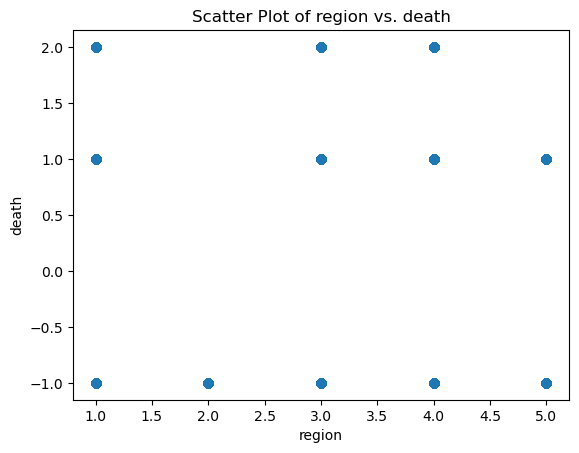

In [18]:
plt.scatter(df['region'], df['death'])
plt.xlabel('region')
plt.ylabel('death')
plt.title('Scatter Plot of region vs. death')
plt.show()

In [21]:
import pandas as pd

df2 = df.copy()  # Create a copy of the original DataFrame

col_9_2 = ['hospital_status', 'death']

# Remove rows with -1 in the specified columns
df2 = df2[~df2[col_9_2].isin([-1]).any(axis=1)]
df2

region  episode_week  episode_week_group  episode_year  gender  age  \
1             1          52.0                   0          22.0     1.0  8.0   
2             1          52.0                   0          22.0     1.0  3.0   
3             1          52.0                   0          22.0     2.0  4.0   
4             1          52.0                   0          22.0     2.0  7.0   
5             1          52.0                   0          22.0     1.0  5.0   
...         ...           ...                 ...           ...     ...  ...   
1048098       5           1.0                   0          22.0     1.0  7.0   
1048103       5           1.0                   0          21.0     1.0  8.0   
1048141       5           1.0                   0          21.0     2.0  8.0   
1048277       5           1.0                   0          23.0     1.0  8.0   
1048352       5           1.0                   0          22.0     1.0  8.0   

         hospital_status  death  
1                      3      1  
2                      1      2  
3                      3      2  
4                      1      1  
5                      2      2  
...                  ...    ...  
1048098                1      1  
1048103                3      1  
1048141                3      1  
1048277                2      1  
1048352                2      1  

[292947 rows x 8 columns]

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


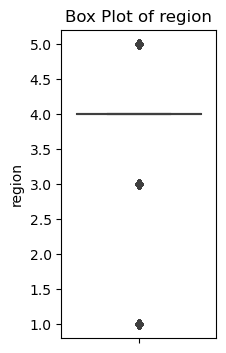

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


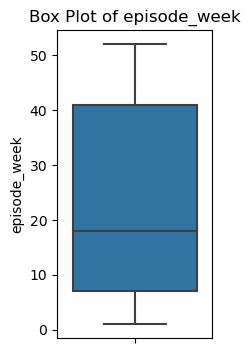

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


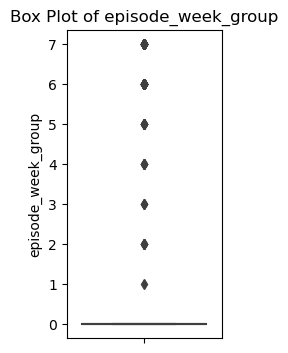

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


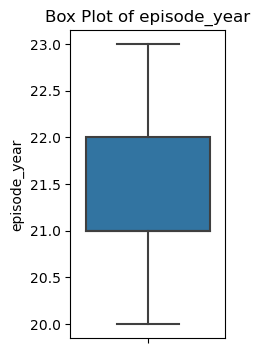

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


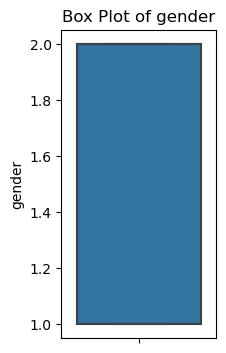

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


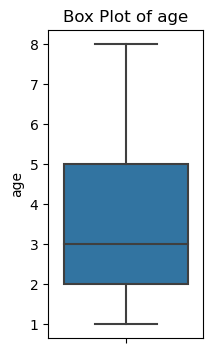

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


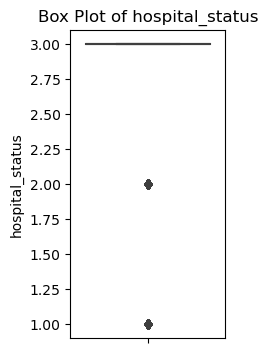

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


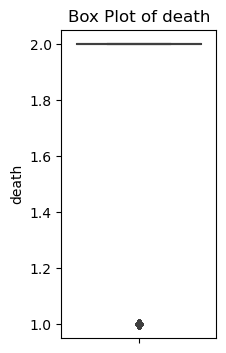

In [22]:
# boxplots

for column in df2.columns:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=df2[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

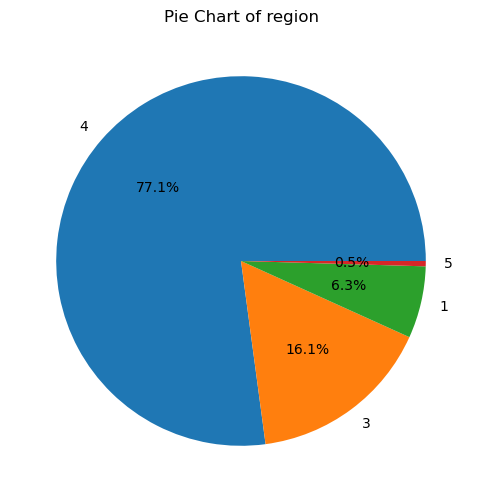

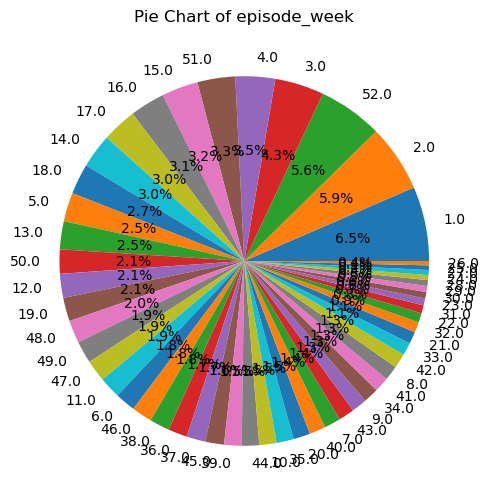

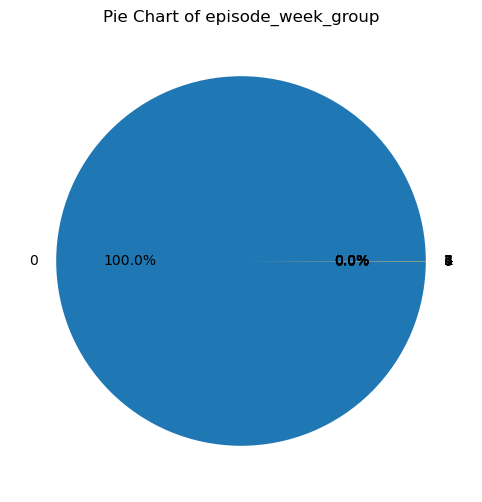

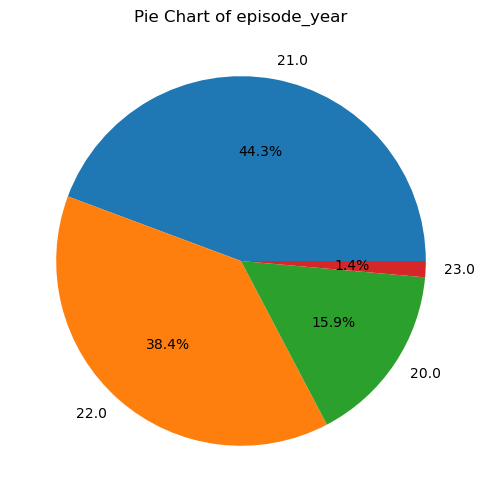

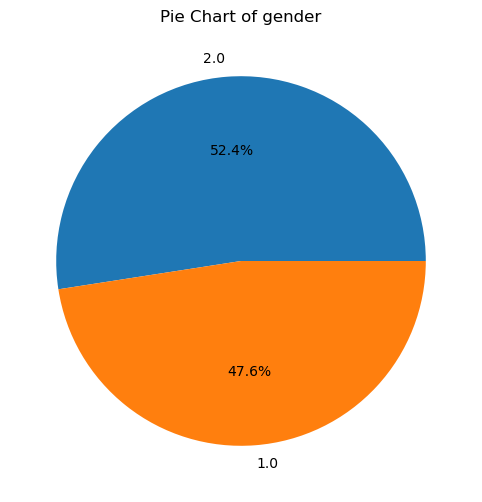

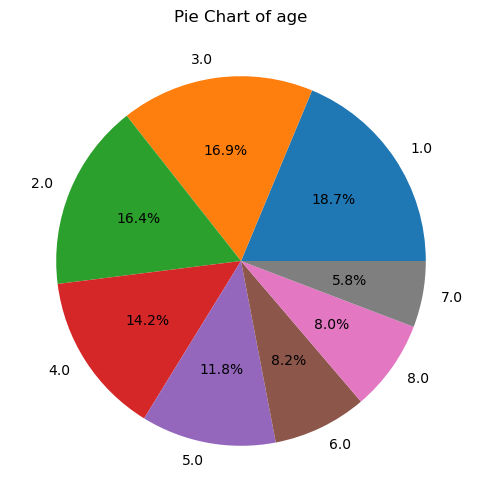

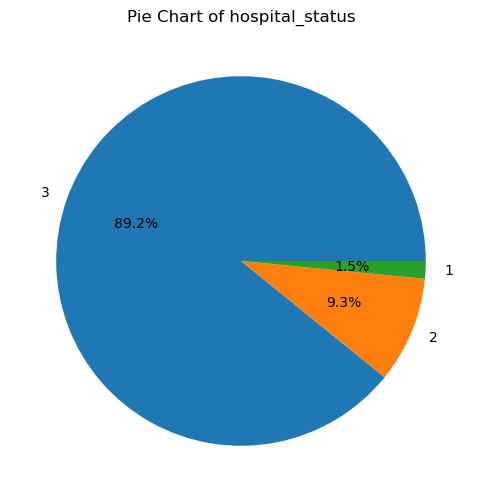

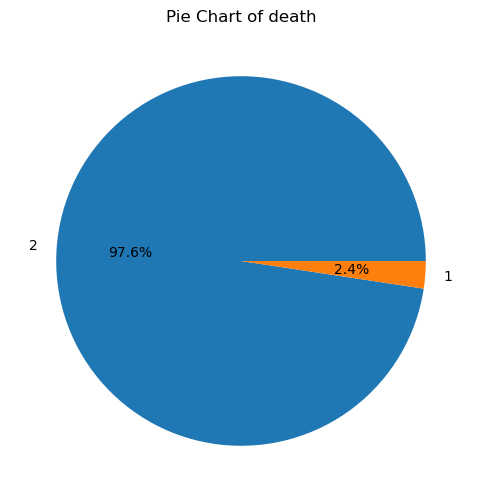

In [23]:
# List of columns to create pie charts for
columns_to_plot = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']

# Assuming 'df' is your DataFrame
for column in columns_to_plot:
    column_count = df2[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()

# After eliminating all "non-stated" values from the "hospital_status" and "death" columns, we have removed approximately 700,000 data points. Additionally, all data for region 2, which corresponds to Quebec, has also been eliminated. To address this, one potential solution could be to retain "non-stated" values as a distinct category for both "hospital_status" and "death" columns. Alternatively, we may explore the possibility of predicting missing values using machine learning techniques to enhance the completeness of our dataset.

1=Atlantic (New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland and Labrador), 2=Quebec, 3=Ontario and Nunavut, 4=Prairies (Manitoba, Saskatchewan, Alberta) and the Northwest Territories, 5=British Columbia and Yukon. source link: https://www150.statcan.gc.ca/n1/pub/13-26-0002/132600022020001-eng.htm

ds